# Dubai House Price Prediction 🏠📈

**Goal:** Build a linear regression model to predict house prices in Dubai using available features (area, bedrooms, location, etc.).  
This notebook shows data loading, exploratory data analysis (EDA), preprocessing, training a Linear Regression model, and evaluating results.


**Notebook overview**
1. Load dataset  
2. Inspect Dataset Structure  
3. Exploratory Data Analysis
4. Creating a Basic Model 
5. Multivariate Linear Regression Model
6. Making Predictions with the Model
7. Conclusion

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

pd.options.display.float_format = '{:.0f}'.format
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)

## 1. Load dataset

This dataset (properties_data.xlsx) was taken from kaggle itself.


In [2]:
housing_data = pd.read_excel("/kaggle/input/properties-data/properties_data.xlsx")

#quick dataset preview
housing_data.head()

,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25,55,2700000,1079,2502,1,2,Medium,...,False,False,True,False,False,False,False,False,True,False
1,6008529,Palm Jumeirah,25,55,2850000,1582,1802,2,2,Medium,...,False,False,True,True,False,False,False,False,True,False
2,6034542,Jumeirah Lake Towers,25,55,1150000,1951,589,3,5,Medium,...,False,True,True,True,False,False,False,True,True,True
3,6326063,Culture Village,25,55,2850000,2020,1411,2,3,Low,...,False,False,False,False,False,False,False,False,False,False
4,6356778,Palm Jumeirah,25,55,1729200,507,3411,0,1,Medium,...,False,True,True,True,True,False,False,True,True,False


## 2. Inspect Dataset Structure
using .info() to get datatypes and not-null counts of columns.
using .describe() to get summary stats of dataset.

In [3]:
housing_data.info()
housing_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1905 non-null   int64  
 1   neighborhood         1905 non-null   object 
 2   latitude             1905 non-null   float64
 3   longitude            1905 non-null   float64
 4   price                1905 non-null   int64  
 5   size_in_sqft         1905 non-null   int64  
 6   price_per_sqft       1905 non-null   float64
 7   no_of_bedrooms       1905 non-null   int64  
 8   no_of_bathrooms      1905 non-null   int64  
 9   quality              1905 non-null   object 
 10  maid_room            1905 non-null   bool   
 11  unfurnished          1905 non-null   bool   
 12  balcony              1905 non-null   bool   
 13  barbecue_area        1905 non-null   bool   
 14  built_in_wardrobes   1905 non-null   bool   
 15  central_ac           1905 non-null   b

,id,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms
count,1905,1905,1905,1905,1905,1905,1905,1905
mean,7573308,25,55,2085830,1417,1327,2,3
std,192525,0,0,2913200,891,668,1,1
min,5528049,25,55,220000,294,362,0,1
25%,7560167,25,55,890000,840,871,1,2
50%,7631829,25,55,1400000,1271,1170,2,2
75%,7670328,25,55,2200000,1703,1622,2,3
max,7706643,25,55,35000000,9576,4806,5,6


## 3. Exploratory Data Analysis.

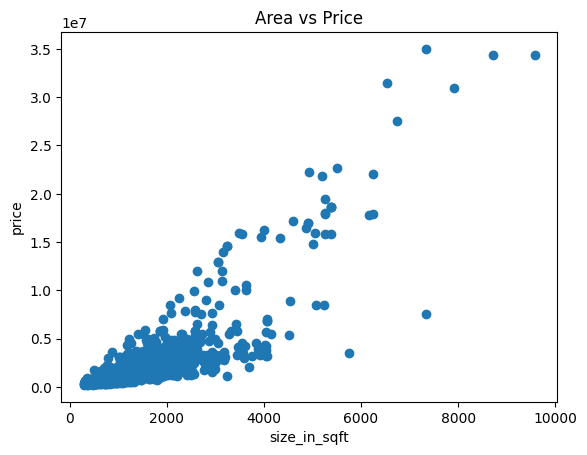

In [4]:
#plotting size vs price chart to see correlation.

plt.scatter(housing_data['size_in_sqft'], housing_data['price'])

plt.xlabel('size_in_sqft')
plt.ylabel('price')
plt.title('Area vs Price')

plt.show()

## 4. Creating a Basic Model
Implementing a basic single variable Linear Regression Model using `size_in_sqft` and `price`

0.6545696546770485


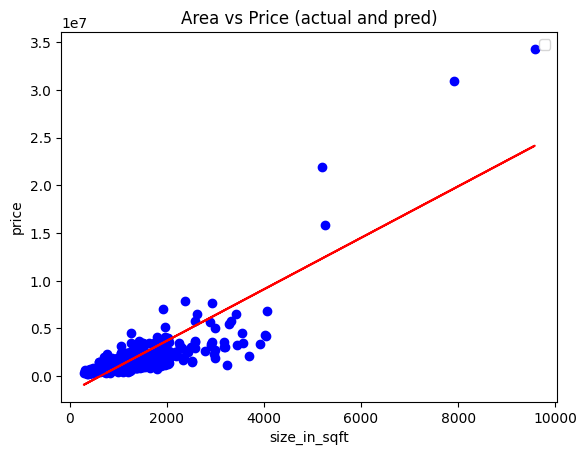

In [5]:
X = housing_data[['size_in_sqft']]
y = housing_data[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model1 = LinearRegression()
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')

plt.xlabel('size_in_sqft')
plt.ylabel('price')
plt.title('Area vs Price (actual and pred)')
plt.legend()

#R-squared model score
print(model1.score(X_test, y_test))

plt.show()

## 5. Multivariate Linear Regression Model
Model using variables that have high correlation to `price`

0.7222204741106366


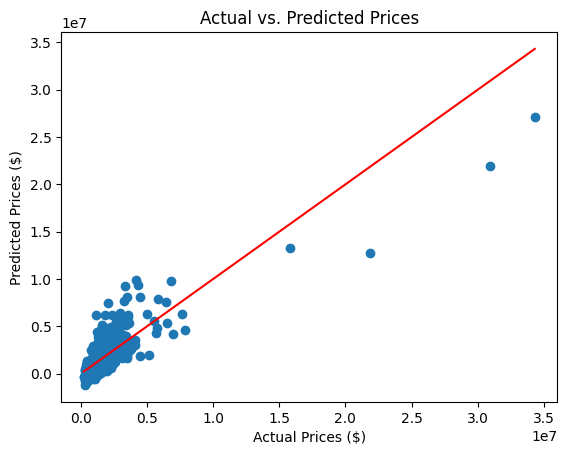

In [6]:
#encoding categorical 'quality' column
housing_data_encoded = pd.get_dummies(housing_data)

features = ['size_in_sqft', 'no_of_bedrooms', 'no_of_bathrooms', 'latitude', 'longitude', 'quality_High']
X = housing_data_encoded[features]
y = housing_data_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

#R-squared model score
print(model2.score(X_test, y_test))

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices ($)")
plt.ylabel("Predicted Prices ($)")
plt.title("Actual vs. Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()

## 6. Making Predictions with the Model
Now that our linear regression model is trained, we can use it to predict the price of a new house.  
We create a small `DataFrme` that represents the features of a house (such as size, bedrooms, bathrooms, location, and quality).  
The model then takes these features as input and outputs the estimated house price.

In [7]:
new_house = pd.DataFrame({
    'size_in_sqft': [2000],
    'no_of_bedrooms': [3],
    'no_of_bathrooms': [2],
    'latitude': [25.2],
    'longitude': [55.2],
    'quality_High': [1]
})

predicted_price = model2.predict(new_house)

price_value = predicted_price[0]
price = f"AED {price_value:,.2f}"

print('Predicted price:', price)

Predicted price: AED 3,924,369.12


## 7. Conclusion

- **Model used:** Linear Regression
- **Performance:** R² = Model1 = `0.65` Model2 = `0.72`  
- **Key findings:** e.g., feature X had strong positive impact; area correlated with price but there's variance due to location/amenities.  
- **Limitations:** skewed target, missing features (e.g., year built, proximity to metro), potential multicollinearity.  
- **Next steps:** try regularized models (Ridge/Lasso), tree-based models (Random Forest, XGBoost), feature engineering (interaction terms), and cross-validation to get more robust estimates.
